In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Testing functions

In [45]:
def compare_2images(original , processed):
    fig= plt.figure(figsize=(10,20))
    plt.subplot(121)
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    plt.title("orignal")
    
    plt.subplot(122)
    plt.imshow(processed, cmap='gray')
    plt.axis('off')
    plt.title("after processing")
    plt.show()    


def try_all_images(func):
    images = [
        "frame1.png",
        "frame2.png",
        "frame3.png",
        "original.png",
        "real.jpg",
        "real2.jpg",
        "real3.jpg",
        "real4.png",
    ]

    for image in images:
        img = cv.imread("./shapes/"+image)
        compare_2images( img, func(img))

# Trying threshold to detect black shapes ❌

In [60]:
def threshold(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gaussian = cv.GaussianBlur(gray, (9, 9), 0)
    _, thresh = cv.threshold(gaussian, 80, 255, cv.THRESH_BINARY_INV)
    return thresh

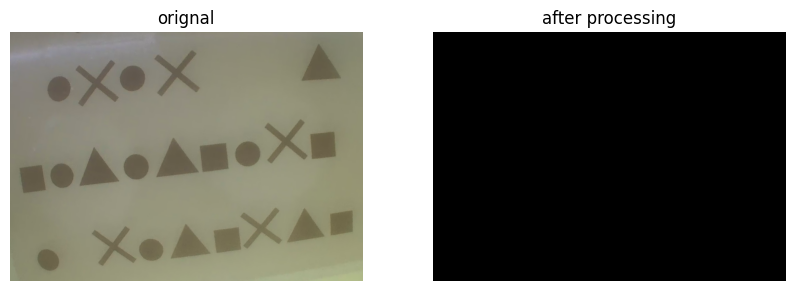

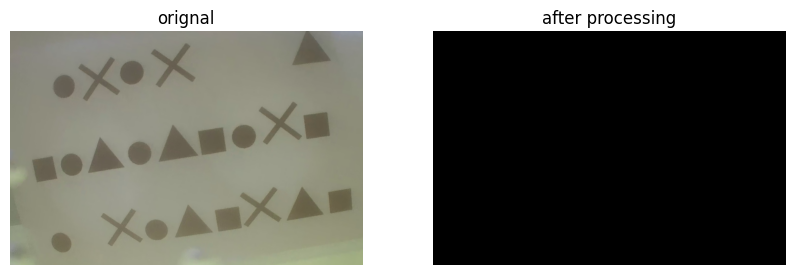

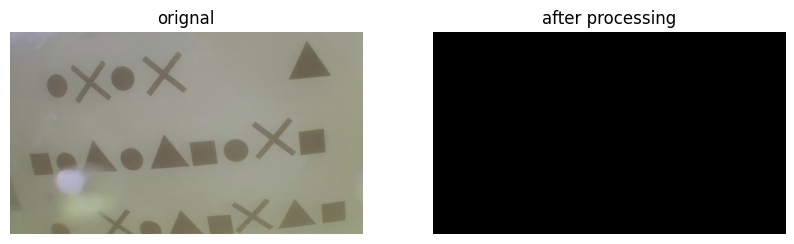

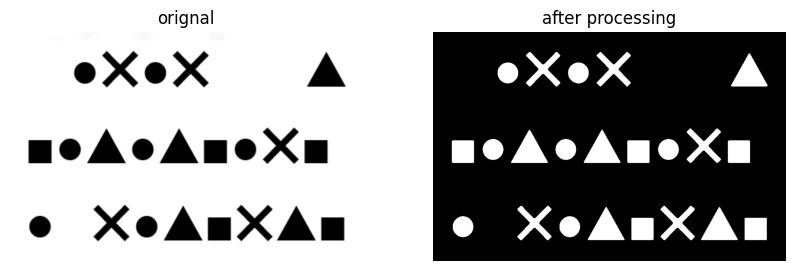

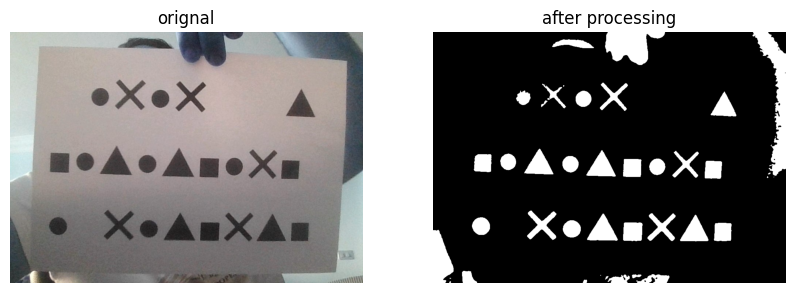

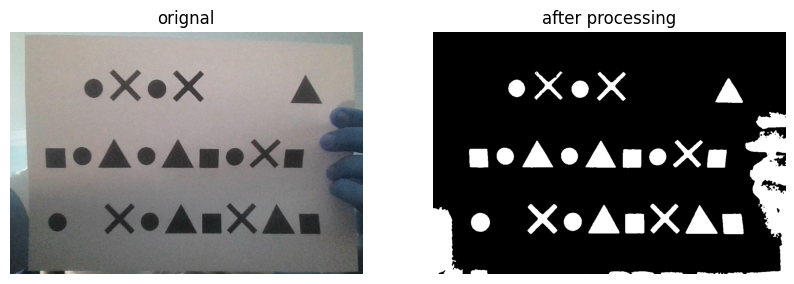

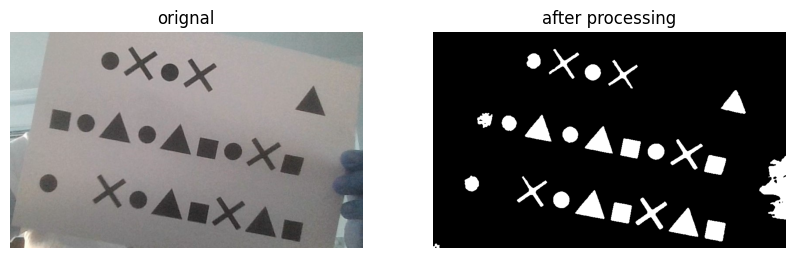

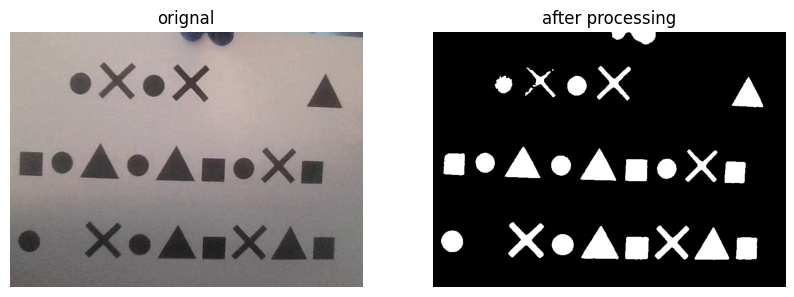

In [61]:
try_all_images(threshold)